# Final Project - CSI4106
Group: project_14

 Tristan Pender - 300065847 - tpend052@uottawa.ca

 Rafael Villacorta - 300061289 - rvill094@uottawa.ca
 
 Hans Barrera - 300080843 - hbarr050@uottawa.ca

In [251]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
import matplotlib.pyplot as plot
# we can use the LabelEncoder to encode the gender feature
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# importing two different imputation methods that take into consideration all the features when predicting the missing values
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import linear_model


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

from sklearn.dummy import DummyRegressor

# oversample the minority class using SMOTE
from imblearn.over_sampling import SMOTE

from collections import Counter
# we can create cool tables
from tabulate import tabulate

np.random.seed(42)

#### Data loading

In [252]:
# load the dataset
df = pd.read_csv('./data/final_demographics_data.csv')

# print the dimensionality of the dataframe
print(df.shape,"\n")
# print the names of the columns that can be used as features when training the machine learning model
print(df.columns,"\n")
# rename columns and print the new names of the columns to allow for future manipulation of dataframe
for column in df.columns:
    new_title = column
    if ' ' in column:
        new_title = new_title.replace(" ", "_")
    if '(' in column:
        new_title = new_title.replace("(", "as_")
        new_title = new_title.replace(")", "")
    if '%' in column:
        new_title = new_title.replace("%", "pct")
    if '+' in column:
        new_title = new_title.replace("+", "plus")
    if ',' in column:
        new_title = new_title.replace(",", "")
    if '-' in column:
        new_title = new_title.replace("-", "_to_")
    if '$' in column:
        new_title = new_title.replace("$", "_dollars")
    df.rename({column: new_title}, axis=1, inplace=True)     
print(df.columns,"\n")

(57, 61) 

Index(['country', 'Region',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15-49) newly infected with HIV',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Age dependency ratio, young (% of working-age population)',
       'Arms exports (SIPRI trend indicator values)',
       'Arms imports (SIPRI trend indicator values)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Average transaction cost of sending remittances from a specific country (%)',
       'Average transaction cost of sending remittances to a specific country (%)',
       'Bank capital to assets ratio (%)',
       'Bank liquid reserves to bank assets ratio (%)',
       'Bank nonperforming loans to total gross loans (%)',
       'Charges for the use of intellectual property, payments (BoP, current US$)',
       'Charges for the use of intellectual proper

#### Exploratory analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 61 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   country                                                                             57 non-null     object 
 1   Region                                                                              57 non-null     object 
 2   Adults_as_ages_15plus_and_children_as_ages_0_to_14_newly_infected_with_HIV          43 non-null     float64
 3   Adults_as_ages_15_to_49_newly_infected_with_HIV                                     42 non-null     float64
 4   Age_dependency_ratio_as_pct_of_working_to_age_population                            57 non-null     float64
 5   Age_dependency_ratio_old_as_pct_of_working_to_age_population                        57 non-null     f

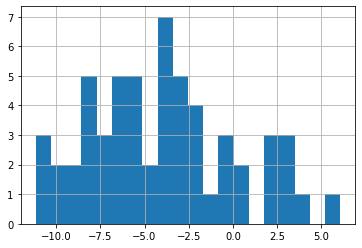

In [253]:
# print the different data types that can be identified from the entire dataset
print(df.info(),"\n")
# print the cultural region distribution in the complete dataset
print(df.Region.value_counts(),"\n")

# print the average gdp growth 
print(df.loc[df.GDP_growth_as_annual_pct != None, 'GDP_growth_as_annual_pct'].mean(), "\n")
# print the average positive gdp growth 
print(df.loc[df.GDP_growth_as_annual_pct > 0, 'GDP_growth_as_annual_pct'].mean(), "\n")
# print the average negative gdp growth 
print(df.loc[df.GDP_growth_as_annual_pct <= 0, 'GDP_growth_as_annual_pct'].mean(), "\n")

# print the median gdp growth 
print(df.loc[df.GDP_growth_as_annual_pct != None, 'GDP_growth_as_annual_pct'].median(), "\n")
# print the median positive gdp growth 
print(df.loc[df.GDP_growth_as_annual_pct > 0, 'GDP_growth_as_annual_pct'].median(), "\n")
# print the median negative gdp growth 
print(df.loc[df.GDP_growth_as_annual_pct <= 0, 'GDP_growth_as_annual_pct'].median(), "\n")

# print the gdp growth distribution of the entire dataset
print(df.GDP_growth_as_annual_pct.hist(bins=20),"\n")

#### Data splitting

(19, 61) 

(38, 61) 

-8.247736     0.026316
-10.365090    0.026316
-0.284839     0.026316
-6.959604     0.026316
-2.701709     0.026316
-0.762478     0.026316
 3.417816     0.026316
-3.569076     0.026316
 2.300000     0.026316
 0.414443     0.026316
 0.525527     0.026316
 2.905836     0.026316
-7.964610     0.026316
-4.059048     0.026316
-4.106583     0.026316
 3.569669     0.026316
-0.307497     0.026316
 1.756651     0.026316
-2.069543     0.026316
-9.905235     0.026316
-3.859374     0.026316
-5.587745     0.026316
-2.870252     0.026316
-11.148812    0.026316
-4.020318     0.026316
 6.056618     0.026316
-5.771502     0.026316
-8.114907     0.026316
-2.439986     0.026316
-3.741328     0.026316
-6.100000     0.026316
 2.857581     0.026316
-8.871146     0.026316
-6.847314     0.026316
-2.088379     0.026316
-8.600310     0.026316
-6.087220     0.026316
-9.573030     0.026316
Name: GDP_growth_as_annual_pct, dtype: float64 

-5.480992     0.052632
-2.817820     0.052632
 2.375522

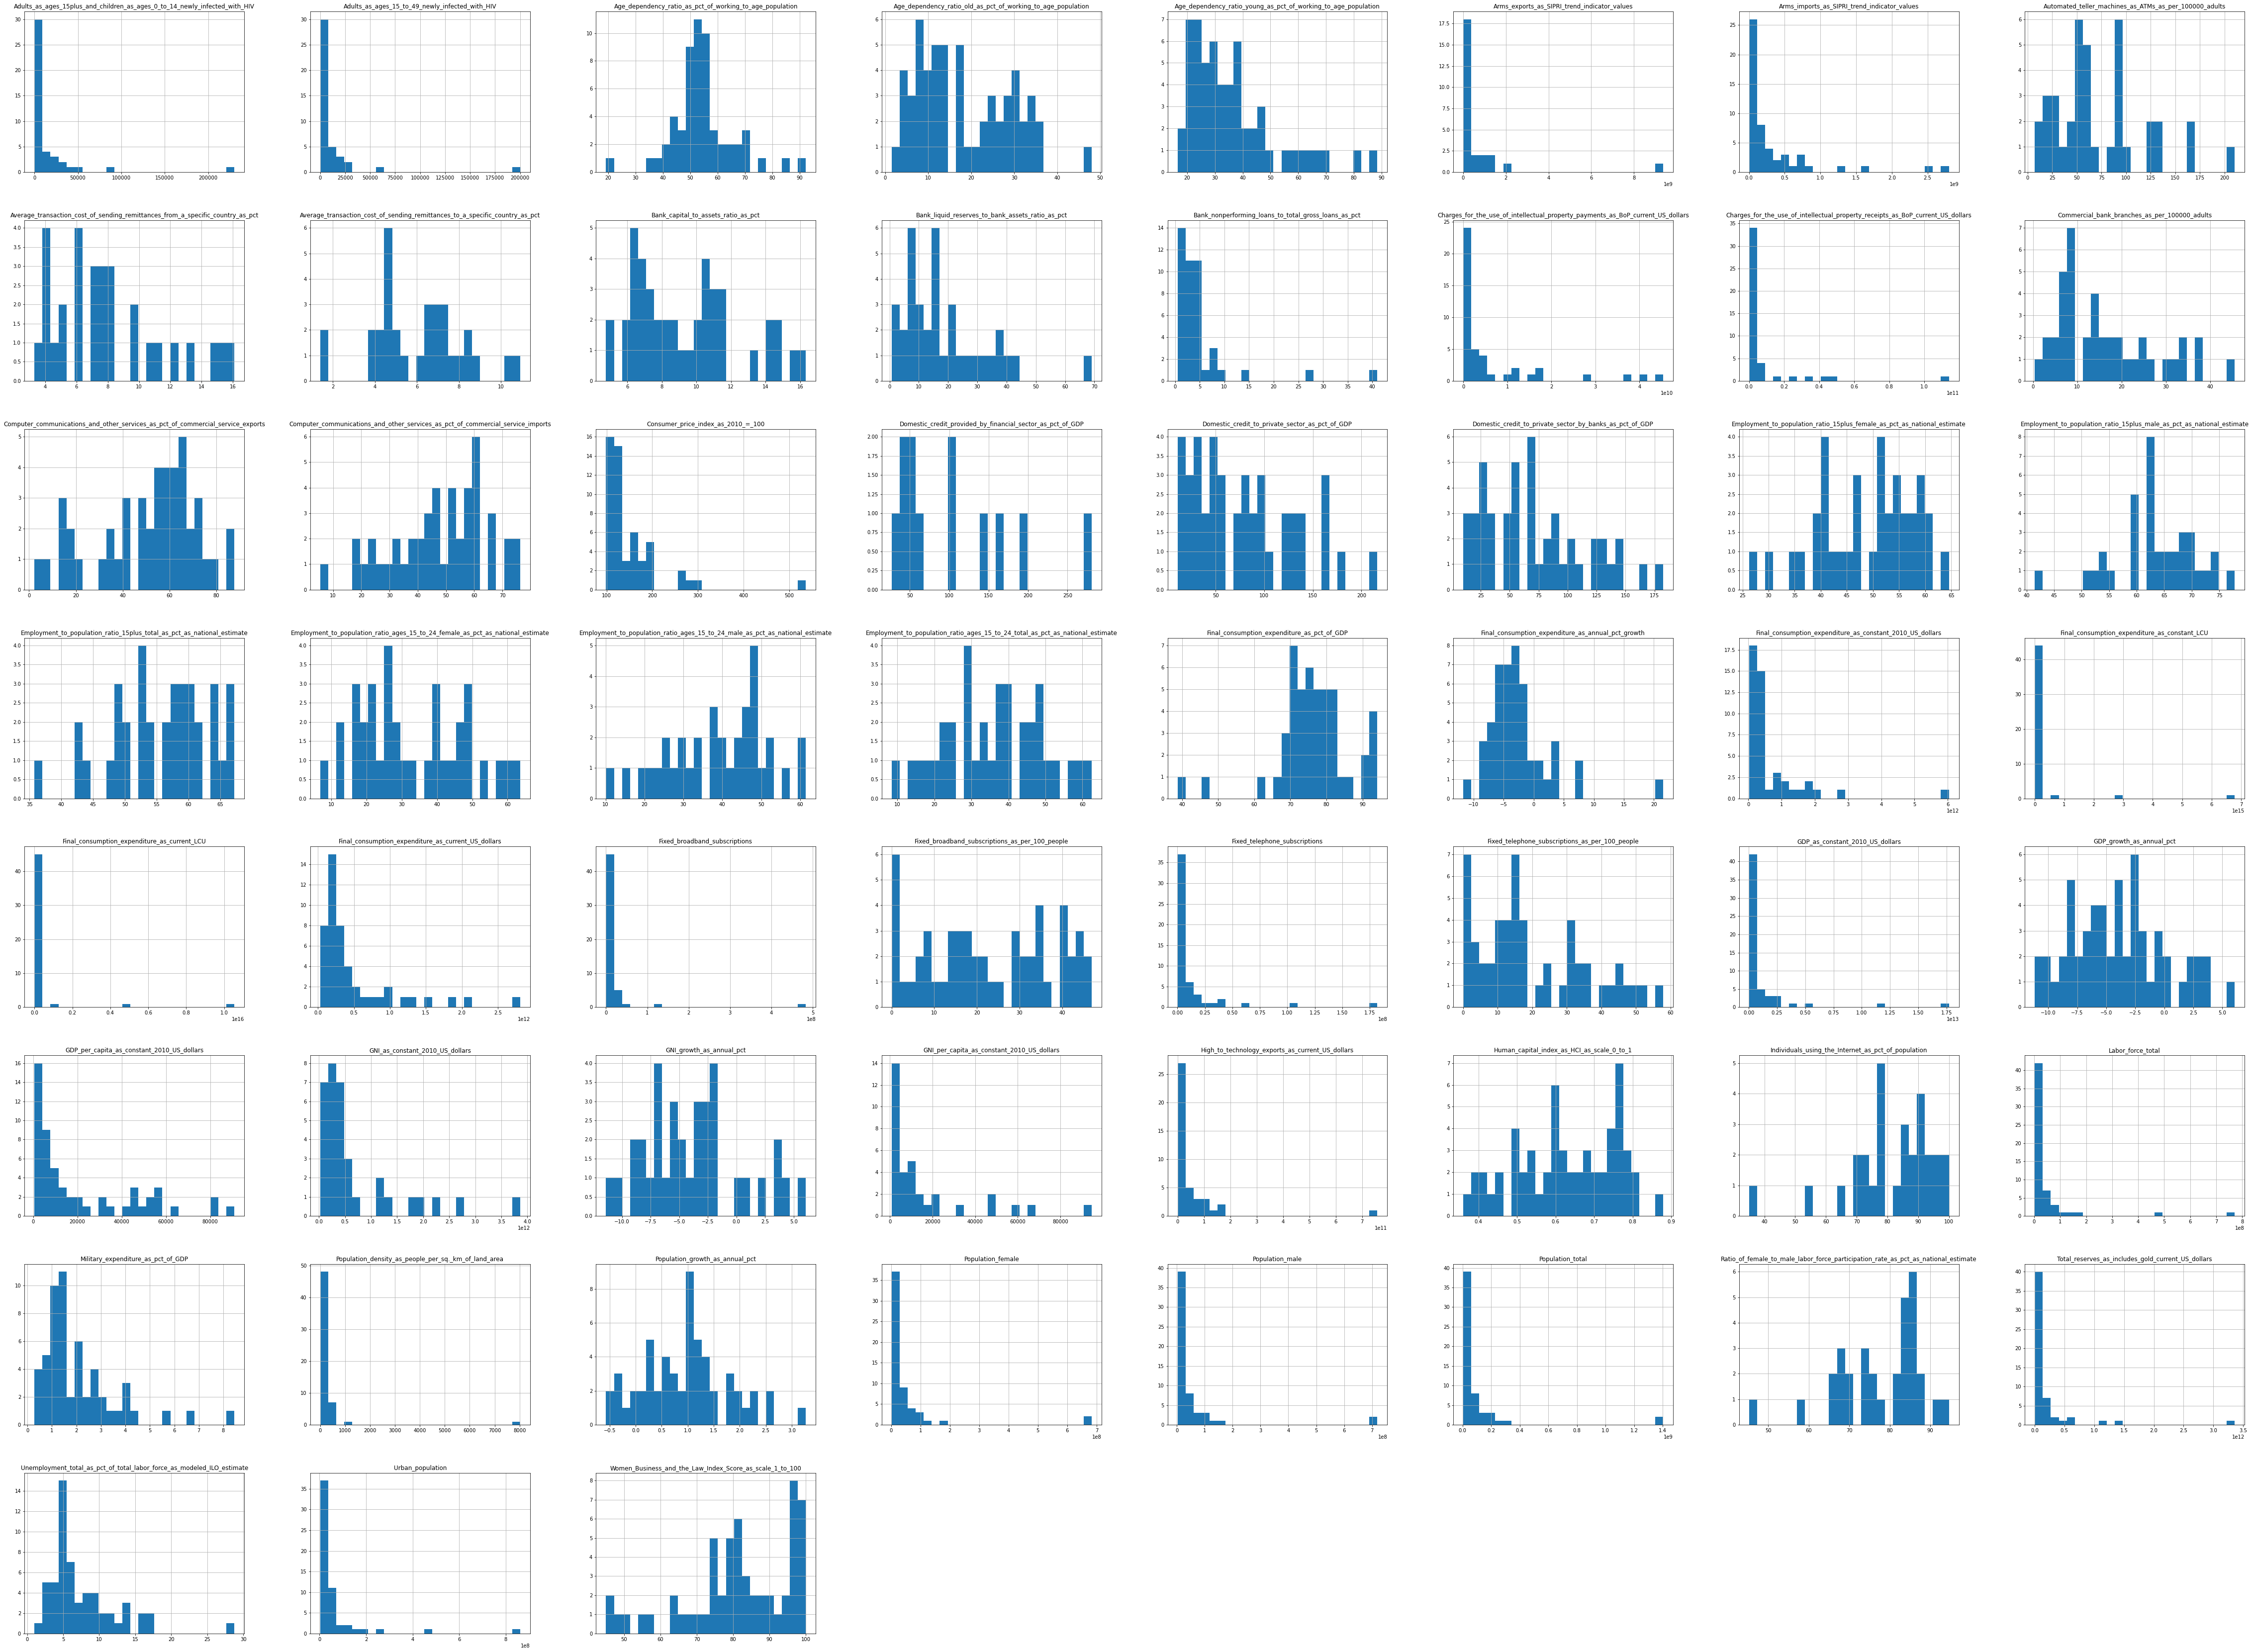

In [254]:
# split the dataset into train and test
df_train, df_test = train_test_split(df, test_size=1/3, random_state=42)
''' We don't really need this bit...
# the sampling bias is not that evident in this dataset
print(df.describe())
print(data_train.describe())
print(df.head())
'''


# print the dimensionality of the test dataset
print(df_test.shape,"\n")
# print the dimensionality of the training dataset
print(df_train.shape,"\n")
# print the proportional distribution of the classes to identify whether or not the classes are equally(or closer) distributed between the train and test datasets 
print(df_train.GDP_growth_as_annual_pct.value_counts()/len(df_train),"\n")
print(df_test.GDP_growth_as_annual_pct.value_counts()/len(df_test),"\n")


# analyze the distribution of the individual features via Gaussian distribution
print(df.hist(bins=25, figsize=(80,60)),"\n")

# identify features that represent a notable correlation 
df_corr = df.drop(columns=['GDP_growth_as_annual_pct'])
corr = df_corr.corr()
for col in corr.columns:
    print(f"correlation with column: {col}")
    print(corr[col].sort_values(ascending=False))
    print()

print(df_train.GDP_growth_as_annual_pct.value_counts(),"\n")
print(df_test.GDP_growth_as_annual_pct.value_counts(),"\n")


#### Model development - Data preparation

In [255]:
# separate the features and the labels to be used in model development
data = df_train.drop(columns=['GDP_growth_as_annual_pct', 'country'])
labels = df_train['GDP_growth_as_annual_pct'].to_numpy(copy=True)

# print the dimensionality of the dataset and the labels
print(data.shape, "\n")
print(labels.shape, "\n")

# find and print how many rows can be identified with the missing values
missing_rows = data[data.isnull().any(axis=1)]
print(missing_rows.shape, "\n")

(38, 59) 

(38,) 

(38, 59) 



#### Data development - Data imputation

In [256]:
# with this data, iterative imputer does not work: gives NaNs and negative values in odd places
imputer_knn = KNNImputer(missing_values=np.nan, n_neighbors=4)

# print the rows before and after being imputed
data_for_impute = data.drop(columns=['Region'])
data_imputed_knn = imputer_knn.fit_transform(data_for_impute)

df_imputed_knn = pd.DataFrame(data_imputed_knn, columns=data_for_impute.columns, index=data_for_impute.index)
#print(missing_rows, "\n") This will be uncommented later
print(df_imputed_knn.loc[missing_rows.index.values], "\n")

    Adults_as_ages_15plus_and_children_as_ages_0_to_14_newly_infected_with_HIV  \
19                                              980.0                            
36                                            25000.0                            
48                                             1587.5                            
37                                             4100.0                            
53                                             9300.0                            
15                                            12000.0                            
9                                              5000.0                            
16                                              962.5                            
24                                            14550.0                            
33                                              500.0                            
54                                              100.0                            
52              

#### Model development - Data scaling

In [257]:
numerical_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('std_scaler', StandardScaler()),
    ])

continuous_feature_names = data.drop(columns=['Region']).columns
nominal_feature_names = ['Region'] 


full_pipeline = ColumnTransformer([
        ("continuous", numerical_pipeline, continuous_feature_names),
        ("nominal", OneHotEncoder(handle_unknown='ignore', sparse=False), nominal_feature_names),
    ])

input_x = full_pipeline.fit_transform(data)
print(input_x, "\n")
for i in range(input_x.shape[0]):
    print(input_x[i], "\n")


[[-0.41384906 -0.3818653   0.17142306 ...  0.          0.
   0.        ]
 [ 0.22501048  0.26829154  0.861393   ...  0.          0.
   0.        ]
 [-0.40347624 -0.37133895 -0.20009573 ...  0.          0.
   1.        ]
 ...
 [ 0.43778635  0.42309078  1.31019832 ...  0.          0.
   0.        ]
 [ 1.0633474   1.08315477 -0.41346236 ...  0.          1.
   0.        ]
 [ 0.01223461  0.08253244  0.09354404 ...  0.          0.
   0.        ]] 

[-0.41384906 -0.3818653   0.17142306  1.91914443 -1.04729755 -0.70483328
 -0.47228053  0.09532704 -0.05033211  0.34019212 -0.54235195  0.41227348
  2.73122549 -0.51798898 -0.38053872  0.56641953 -2.10103059 -1.46289323
 -1.06563179 -0.04966388  0.20603169  0.32797937 -1.40273482 -1.7446987
 -1.68083534 -1.40784171 -1.9998117  -1.72057442  1.49956885 -0.31444219
 -0.39187144 -0.26140239 -0.25895742 -0.54411147 -0.20763082  1.5477409
 -0.21483014  2.3046264  -0.35272099  0.15772269 -0.26932044 -0.37938778
  0.02481863 -0.34254722  0.72692631 -0.11366

#### Model  development - Training

In [258]:
# we will be using linear regression due to the obvious nature of this problem
model_lr = linear_model.LinearRegression()
lr_parameters = [
    {'n_jobs':[-1]}
]
#print(model_lr.get_params().keys()) I'm open to suggestions for the params

# initialize gridsearch
scoring = {"explained_var": "explained_variance", "mean_abs_err": "neg_mean_absolute_error", "med_abs_err": "neg_median_absolute_error","r2": "r2"}
grid_search = GridSearchCV(model_lr, param_grid=lr_parameters, cv=3, scoring=scoring, return_train_score=True, n_jobs=-1, refit='explained_var')


# fit the training data
grid_search.fit(input_x, labels)
# print the best parameters
print(grid_search.best_params_)
# print the best estimator
print(grid_search.best_estimator_)
# print the best score from trained GridSearchCV model
print(grid_search.best_score_)


{'n_jobs': -1}
LinearRegression(n_jobs=-1)
-0.30676787940936595


#### Model development - Cross validation

In [259]:
# print the grid search cross-validation results listing the above mentioned evaluation methods
cvscr = grid_search.cv_results_
for exp_var, mean_err, med_err, r2 in zip(cvscr['mean_test_explained_var'], cvscr['mean_test_mean_abs_err'], cvscr['mean_test_med_abs_err'], cvscr['mean_test_r2']):
    print(f"exp_var={exp_var} : mean_err={mean_err} : med_err={med_err} : r2={r2}\n")
# This explains the results: https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score

# use a dummy classifier to identify a majority class baseline to compare your prediction results
dummy_clf = DummyRegressor(strategy='median')
dummy_clf.fit(input_x, labels)
dummy_clf.score(input_x, labels)

exp_var=-0.30676787940936595 : mean_err=-3.982821096911875 : med_err=-3.6073122695269704 : r2=-0.3684385331947319



-0.004412797754321129

#### Model development - Testing

In [260]:
# prepare the test data to be predicted
test_data = df_test.drop(columns=['GDP_growth_as_annual_pct', 'country'])
test_labels = df_test['GDP_growth_as_annual_pct'].to_numpy(copy=True)

# print the dimensionality of the dataset and the labels
print(test_data.shape)
print(test_labels.shape, "\n")

# transform test data for prediction
input_x_test = full_pipeline.transform(test_data)

# obtain predictions on test data using the best model from GridSearchCV
test_predictions = grid_search.best_estimator_.predict(input_x_test)

# generate different metrics for test predictions
m1_test = explained_variance_score(test_labels, test_predictions)
m2_test = mean_absolute_error(test_labels, test_predictions)
m3_test = median_absolute_error(test_labels, test_predictions)
m4_test = r2_score(test_labels, test_predictions)
m5_test = mean_absolute_percentage_error(test_labels, test_predictions)
m6_test = max_error(test_labels, test_predictions)
m7_test = mean_squared_error(test_labels, test_predictions)


print("Explained variance score: ",m1_test)
print("Mean absolute error: ",m2_test)
print("Median absolute error: ",m3_test)
print("R2 score: ",m4_test)
print("Mean absolute percentage error: ",m5_test)
print("Max_error: ",m6_test)
print("Mean_squared_error: ",m7_test)

(19, 59)
(19,) 

Explained variance score:  -38.75844040540919
Mean absolute error:  8.27490876977059
Median absolute error:  4.993892859631906
R2 score:  -41.16115624904988
Mean absolute percentage error:  2.0532342843998252
Max_error:  81.51072067870501
Mean_squared_error:  370.79204239814885


#This is as far as we can go for this model. Oversampling doesn't seem to take continuous labels for a data imbalance section



#oversample = SMOTE()

#input_x_over, y_over = oversample.fit_resample(input_x, labels)